#### Author: Allan Jeeboo
#### Preferred name: Vyncent van der Wolvenhuizen
#### Affiliation: Data Science Student at Triple Ten
#### email: vanderwolvenhuizen.vyncent@proton.me
#### Date Started: 2025-02-13
#### Last Updated: 2025-04-07 16:33 EST 

---
---

# 1.0 Introduction

This project aims to identify patterns that determine whether or not a game succeeds. We'll be using a dataset from 2016 and pretend that we are a global online video game store currently planning advertising campaigns for 2017, which is "next year". 

In this project, we'll be assuming the role of a data scientist for the online store Ice, which sells video games all over the world. We've been tasked with identifying patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

We have data from the years 1980 to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

>__Note 1__: 
This is the TripleTen Sprint 5 Integrated Project. Most of the text in Section 1 is adapted from the project's [page overview](https://tripleten.com/trainer/data-scientist/lesson/2fede7ea-9ca6-42a3-ba35-bf4142d2fcc0/). 


__Project Workflow__:  
1. **Introduction**: Overview of the project goals and context.  
2. **Data Preprocessing**: Preparing the dataset by handling missing values, renaming columns, and ensuring data consistency.  
3. **EDA**: Exploratory Data Analysis to uncover trends and patterns in the data.  
4. **Regional Profiles**: Analyzing sales data by region to identify regional preferences.  
5. **Testing Hypotheses**: Validating assumptions and testing statistical hypotheses.  
6. **Conclusion**: Summarizing findings and providing actionable insights.  

---

### 1.1 Import Data
Let's import the libraries we need and then load the data.

In [143]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


df = pd.read_csv("games.csv")

df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


---

### 1.2 Data Description

Below is a summary of what each column in the dataset represents:

- **Name**: The title of the game.
- **Platform**: The platform on which the game was released (e.g., PS2, X360, Wii).
- **Year_of_Release**: The year the game was released.
- **Genre**: The genre of the game (e.g., Action, Role-Playing, Sports).
- **NA_sales**: Sales in North America (in USD millions).
- **EU_sales**: Sales in Europe (in USD millions).
- **JP_sales**: Sales in Japan (in USD millions).
- **Other_sales**: Sales in other regions (in USD millions).
- **Critic_Score**: The average critic score for the game (maximum of 100).
- **User_Score**: The average user score for the game (maximum of 10).
- **Rating**: The ESRB rating of the game (e.g., E for Everyone, T for Teen, M for Mature).

> **Note 2**: Data for 2016 may be incomplete.

This text is adapted from the Integrated Project 1 overview page on Triple Ten.  
[Project Overview Link](https://tripleten.com/trainer/data-scientist/lesson/2fede7ea-9ca6-42a3-ba35-bf4142d2fcc0/) 

---
---


# 2.0 Data Preprocessing
In this section, we'll prepare the dataset for analysis by addressing missing values, renaming columns, and ensuring data consistency. We'll begin by standardizing column names to follow Python conventions. Next, we'll examine the data types of each column and identify any missing or inconsistent values. We'll then develop strategies to handle these issues, such as filling or removing missing values and converting data types where necessary. Additionally, we'll check for duplicate records and create new columns if needed to facilitate later analysis. By the end of this section, the dataset will be clean and ready for exploratory data analysis. 

---

### 2.1 Data Cleaning
Let's rename the columns to lowercase to comply with Python's [PEP8 Style Guide](https://peps.python.org/pep-0008/). Afterward, we'll examine the data types, check for missing values, and review the dataset's shape.

In [144]:
df.columns = df.columns.str.lower()

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [145]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Why is year_of_release a float and not an integer?

In [146]:
nan_sum = df.isna().sum()

print(f'Number of NaNs per column:\n{nan_sum}')

Number of NaNs per column:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [147]:
nan_percent = df.isna().sum()/df.shape[0]
print(f'Number of NaNs per column (%):\n{nan_percent}')

Number of NaNs per column (%):
name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64


The `critic_score`, `user_score`, and `rating` score columns all have a hefty amount of missing data. `name` and `genre` both have only two missing values, so let's look at which rows those are.

In [148]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The missing rows in both the "name" and "genre" columns are identical! In the next subsection, we'll address these missing values. Subsequently, in the following subsections, we'll tackle the remaining NaN values in other columns. 

---

### 2.2 Name & Genre NaNs

In the last subsection, we found that there are two nans in both 'name' and 'genre' in addition to the rows with the two missing values being identical in both columns. Let's use fillna on the two nan values in the "name" and "genre" columns with "Unknown" and "genre.mode" as values. 

[a] The names of these two games aren't necessary for this project.

[b] 'genre' isn't numerical, so you can't take the mean of it and it wouldn't make sense to take the median of this column; the mode ('action') comprises ~20% of the data which works well because it's only two values out of 16,715 (0.01% of the data).

In [149]:
df.groupby("genre").size()/df.shape[0]

genre
Action          0.201555
Adventure       0.077954
Fighting        0.050793
Misc            0.104696
Platform        0.053126
Puzzle          0.034699
Racing          0.074723
Role-Playing    0.089620
Shooter         0.079150
Simulation      0.052229
Sports          0.140473
Strategy        0.040862
dtype: float64

In [150]:
df.genre = df.genre.fillna(df.genre.mode()[0])
df.name = df.name.fillna("Unknown")
df.genre.isna().sum()

np.int64(0)

---

### 2.3 Year of Release NaNs

Alright, let's move on to the `year_of_release` column. To better understand the percentage of games released in a given year, we'll `groupby()` `year_of_release` then use `size()` to obtain how many games were released in a given year. After that, we'll check the `mean()`, `median`, and `mode()`.

### Initial Thoughts:
Older games are more likely to have missing values. This assumption is based on the idea that data on older games is less abundant and more prone to being lost over time.

In [151]:
df.groupby("year_of_release").size()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
dtype: int64

In [152]:
print(f'Mean year of release:\n{df.year_of_release.mean()}\n\n'
      f'Median year of release:\n{df.year_of_release.median()}\n\n'
      f'Mode year of release:\n{df.year_of_release.mode()}\n')

Mean year of release:
2006.4846163200777

Median year of release:
2007.0

Mode year of release:
0    2008.0
Name: year_of_release, dtype: float64



All of our rows came with their 'platform' data intact, so we can groupby platform and check for nans to know where the most nans occur.

In [153]:
year_nans = df.year_of_release.isna().sum() 
year_nans_by_platform = df.groupby('platform')['year_of_release'].apply(lambda x: x.isna().sum()) 

(year_nans_by_platform/year_nans) * 100 

platform
2600     6.319703
3DO      0.000000
3DS      2.973978
DC       0.000000
DS      11.152416
GB       0.371747
GBA      4.089219
GC       5.204461
GEN      0.000000
GG       0.000000
N64      1.115242
NES      0.000000
NG       0.000000
PC       6.319703
PCFX     0.000000
PS       2.602230
PS2     12.639405
PS3      9.293680
PS4      0.000000
PSP      5.947955
PSV      0.371747
SAT      0.000000
SCD      0.000000
SNES     0.000000
TG16     0.000000
WS       0.000000
Wii     12.639405
WiiU     0.000000
X360    11.152416
XB       7.806691
XOne     0.000000
Name: year_of_release, dtype: float64

In [154]:
df.groupby(['name', 'year_of_release']).first()

,,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
name,year_of_release,,,,,,,,,
Beyblade Burst,2016.0,3DS,Role-Playing,0.00,0.00,0.03,0.00,NaN,None,None
Fire Emblem Fates,2015.0,3DS,Role-Playing,0.81,0.23,0.52,0.11,NaN,None,None
Frozen: Olaf's Quest,2013.0,3DS,Platform,0.27,0.27,0.00,0.05,NaN,None,None
Haikyu!! Cross Team Match!,2016.0,3DS,Adventure,0.00,0.00,0.04,0.00,NaN,None,None
Tales of Xillia 2,2012.0,PS3,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T
...,...,...,...,...,...,...,...,...,...,...
thinkSMART FAMILY!,2010.0,Wii,Misc,0.03,0.00,0.00,0.00,NaN,tbd,E
thinkSMART: Chess for Kids,2011.0,DS,Misc,0.01,0.00,0.00,0.00,NaN,tbd,E
uDraw Studio,2010.0,Wii,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E


So as for my initial thoughts, the data suggests that I'm incorrect. We have a mean of mid 2006, a median of 2007, and a mode of 2008. There is a high clustering of data between the years 2005 - 2011 and all of the platforms that have >5% of their values as NaNs (aside from the 2600) are generation 6 and 7 platforms. The 8th gen of platforms began in 2012, and since this data is from 2016, platforms such as the PS4 and XOne don't have as much time or information to make an impact. Considering the values, the median would make the most sense because it lies directly in the middle of all values and it's likely that many of our missing values lie around it. It also coincides with roughly the middle of the 6th and 7th gens (1998 - 2017).

*Immersion Break*

A note to those who are non-gamers, platform generations do overlap, e.g., the 9th generation began in 2020 with the release of the PS5 and XBox Series X/S, but the 8th generation is still ongoing as well; however, following historical patterns, the 8th generation should end either this or next year with the anticipation of the 10th generation beginning in 2027 or 2028. 

*Unbreak Immersion*

In [155]:
df.year_of_release = df.year_of_release.fillna(df.year_of_release.median())

In [156]:
df.year_of_release = df.year_of_release.astype(int)

df.year_of_release

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

As mentioned earlier, it doesn't make sense for this column to be a float, so let's change it to int. 

---

### 2.4 Critic Score NaNs
Time to deal with the "critic_score" nans. First let's find the `mean()` and `median()`, but we'll `groupby()` `df.genre` before applying these methods. Since grouping by `df.genre` provides us with narrower values, if we were to pick a game with a nan out of some genre of choice, we now have an idea of where that game's rating is likely to be found.

In [157]:
critic_score_mean = df.groupby("genre")["critic_score"].mean()
print(f'Critic score mean: \n {critic_score_mean} \n')

critic_score_median = df.groupby("genre")["critic_score"].median()
print(f'Critic score median: \n {critic_score_median}')

Critic score mean: 
 genre
Action          66.629101
Adventure       65.331269
Fighting        69.217604
Misc            66.619503
Platform        68.058350
Puzzle          67.424107
Racing          67.963612
Role-Playing    72.652646
Shooter         70.181144
Simulation      68.619318
Sports          71.968174
Strategy        72.086093
Name: critic_score, dtype: float64 

Critic score median: 
 genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64


Based on the given information, I'll use the `median()`. Some games could receive a low score which could skew the data towards a lower value, as it would seem to show. The median, however, displays the value directly in the middle of the list. Because all values in the column are whole numbers, it would look cleaner to change it to int.

In [158]:
df.critic_score = df.critic_score.fillna(critic_score_median[1])
df

C:\Users\vande\AppData\Local\Temp\ipykernel_13516\3914514905.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66.0,NaN,NaN


In [159]:
df.critic_score = df.critic_score.astype(int)
df.critic_score.dtype

dtype('int64')

In [160]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

---

### 2.5 User Score NaNs

In [161]:
df.user_score.unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There's a unique value called 'tbd' in this column. Let's convert it/them to nans. Afterward, we'll start dealing with the column's nan values. First we'll .groupby() "genre", then take the mean and median. 

In [162]:
df.user_score = df.user_score.replace("tbd", np.nan)
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [163]:
# Convert user_score to numeric, coercing errors to NaN
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

#Calculate mean and median user scores by genre
genre_user_mean = df.groupby("genre")["user_score"].mean()
print(f'User mean by genre: \n {genre_user_mean}')

genre_user_median = df.groupby("genre")["user_score"].median()
print(f'User median by genre: \n\n {genre_user_median}')

User mean by genre: 
 genre
Action          7.054044
Adventure       7.133000
Fighting        7.302506
Misc            6.819362
Platform        7.301402
Puzzle          7.175000
Racing          7.036193
Role-Playing    7.619515
Shooter         7.041883
Simulation      7.134593
Sports          6.961197
Strategy        7.295177
Name: user_score, dtype: float64
User median by genre: 

 genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64


With this column, we'll use the median of genre users to fill the nans, just like the previous column.

In [164]:
df.user_score = df.user_score.fillna(genre_user_median[1])
df

C:\Users\vande\AppData\Local\Temp\ipykernel_13516\2185083810.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66,7.6,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66,7.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66,7.6,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66,7.6,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66,7.6,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66,7.6,NaN


---

### 2.6 Rating NaNs
My approach to this is to again groupby "genre", but then apply the lambda parameter and mode. It wouldn't make sense to take the mean of a series of strings, and the median would provide the value in the middle of the list as opposed to something close to 'average'. 

In [165]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

In [166]:
rating_mode = df.groupby("genre")["rating"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df['rating'] = df.groupby("genre")["rating"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
print(rating_mode)

genre
Action          T
Adventure       E
Fighting        T
Misc            E
Platform        E
Puzzle          E
Racing          E
Role-Playing    T
Shooter         M
Simulation      E
Sports          E
Strategy        T
Name: rating, dtype: object


In [167]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [168]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

---

### 2.7 Column adjustments
It'd be useful to see the total amount of sales, so let's create a column for that and then reorder the column names so that our new column appears between "other_sales" and "critic_score".

In [169]:
# Calculate total sales (sum of all sales in every region) for each game and place the results in a separate column.
df["total_sales"] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66,7.6,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66,7.6,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66,7.6,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66,7.6,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66,7.6,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66,7.6,E,0.01


In [170]:
new_column_order = ['name', 
                    'platform', 
                    'year_of_release', 
                    'genre', 
                    'na_sales', 
                    'eu_sales', 
                    'jp_sales', 
                    'other_sales', 
                    'total_sales', 
                    'critic_score', 
                    'user_score', 
                    'rating']

df = df[new_column_order] 
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,66,7.6,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,66,7.6,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,66,7.6,T
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,66,7.6,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,66,7.6,E
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,66,7.6,E


In [171]:
df.duplicated().sum()

np.int64(0)

---

### 2.8 Summary: Data Preprocessing 
Before moving on to EDA, let's summarize the data preprocessing steps and key observations:

- **Column Standardization:** All column names were converted to lowercase for consistency and easier reference.
- **Missing Values:** We addressed missing values in all columns:
    - For `name` and `genre`, missing values were filled with "Unknown" and the mode, respectively.
    - `year_of_release` NaNs were replaced with the median year and converted to integer type.
    - `critic_score` and `user_score` NaNs were filled with the median value within each genre, ensuring genre-specific imputation.
    - `rating` NaNs were filled with the mode within each genre.
    - Special values like 'tbd' in `user_score` were converted to NaN before imputation.
- **Data Types:** Data types were corrected where necessary, such as converting `year_of_release` and `critic_score` to integers and ensuring numeric types for sales columns.
- **New Features:** A `total_sales` column was created to aggregate sales across all regions, and columns were reordered for logical flow.
- **Duplicates:** The dataset was checked for duplicate rows to ensure data integrity.

**Initial Observations:**
- There's a significant clustering of game releases and sales in the mid to late 2000s, with platforms like the PS2, Xbox 360, and Wii dominating this era.
- However, since our goal is to inform advertising campaigns for 2017, focusing on more recent data and current-generation platforms will be more relevant for actionable insights.
- The dataset is now clean, consistent, and ready for exploratory data analysis (EDA), where we'll examine trends in game releases, sales metrics, and visualize key patterns to guide our strategic recommendations. 

---
---

# 3.0 Exploratory Data Analysis (EDA) 
In this chapter, we'll conduct exploratory data analysis (EDA) to uncover trends, patterns, and insights within the video game sales dataset. We'll begin by examining the number of games released each year to identify periods of growth or decline in the industry. Next, we'll analyze sales by platform, exploring both overall trends and the performance of individual platforms over time. We'll then focus on recent years to determine which platforms are currently leading in sales and which may be declining.

Furthermore, we'll investigate global sales distributions by platform and genre, using visualizations such as boxplots and bar charts to compare performance. We'll also explore the relationship between review scores (both user and critic) and total sales to assess whether higher-rated games tend to sell more copies. Additionally, we'll examine the sales performance of multi-platform games to see how the same title fares across different systems.

Throughout this chapter, we'll use a variety of statistical and visualization techniques to guide our understanding, but we'll refrain from drawing conclusions until all analyses are complete. 

---

### 3.1 Number of Games Released per Year

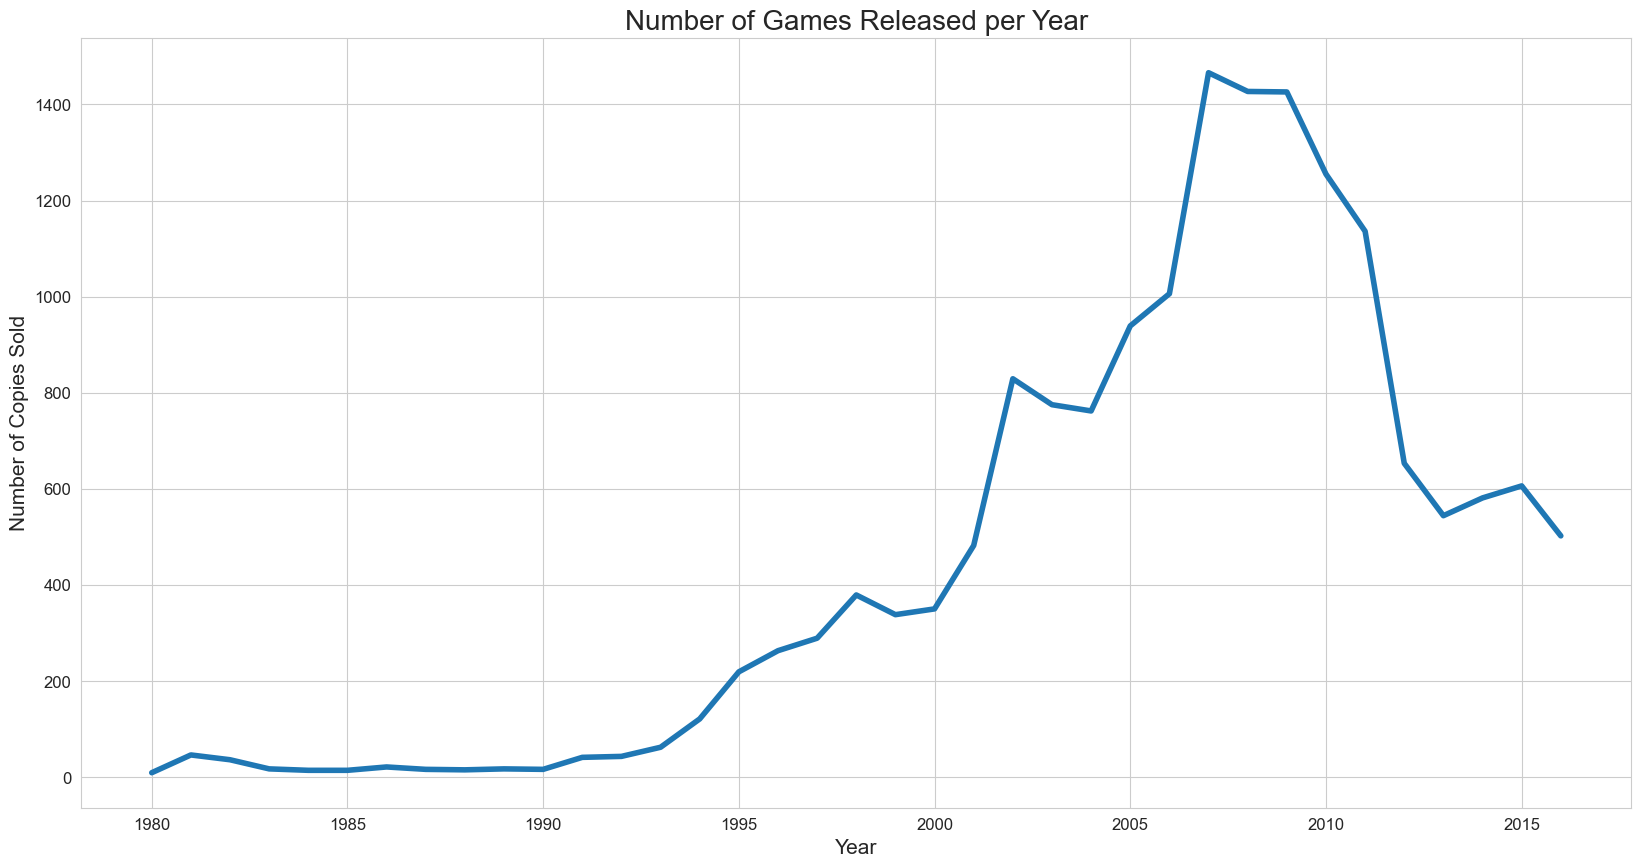

In [172]:
# Group by year of release and number of games released per year
games_per_year = df.groupby("year_of_release").size()
games_per_year.plot(kind='line', 
                    linewidth= 4, 
                    figsize=(20, 10), 
                    grid= True, 
                    )

# Add labels and title
plt.xlabel('Year', 
           fontsize= 15)
plt.ylabel('Number of Copies Sold', 
           fontsize= 15)
plt.title('Number of Games Released per Year', 
          fontsize= 20)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.tick_params(axis= 'both', 
                which= 'both', 
                width= 2)

plt.show()

In [173]:
game_sales = df.groupby('year_of_release').agg({'name': 'count'})
game_sales = game_sales.rename(columns = {'name': 'Number of Games Sold'}, 
                               level = 0)
game_sales.index.rename('year')
game_sales

,Number of Games Sold
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


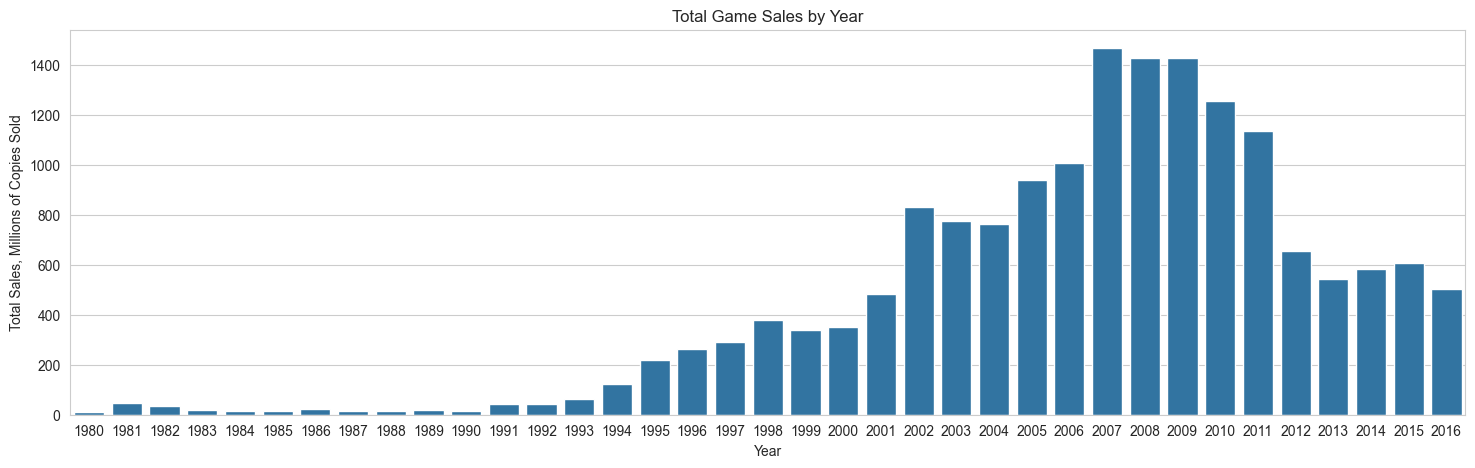

In [174]:
game_sales = df.pivot_table(index = 'year_of_release', 
                            values = 'name', 
                            aggfunc = 'count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize = (18, 5))
sns.countplot(data = df, 
              x = 'year_of_release')

plt.title('Total Game Sales by Year')
plt.ylabel('Total Sales, Millions of Copies Sold')
plt.xlabel('Year'); 

In [175]:
df.year_of_release.describe()

count    16715.000000
mean      2006.492911
std          5.829925
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

From this we see that the number of games released per year peaked in 2008, which matches our mode that we found earlier, and has fallen by nearly 3.5 times what it is in 2016. Secondly we can see that 75% of the data is from 2003 onwards, so 13 years of data, and 50% of titles released from 2008 onwards, which is only 8 years. Since this ranges from 1980 - 2016, that means that the amount of games released between 1980 and 2007 compared to 2008 - 2016 is the same. 50% of game releases happened in ~22% of the total time. 

---

### 3.2 Sales by Platform
First I'd like to get a few general overviews:

1) Sales of all platforms in the data over time.
2) Total sales by year of release and platform.

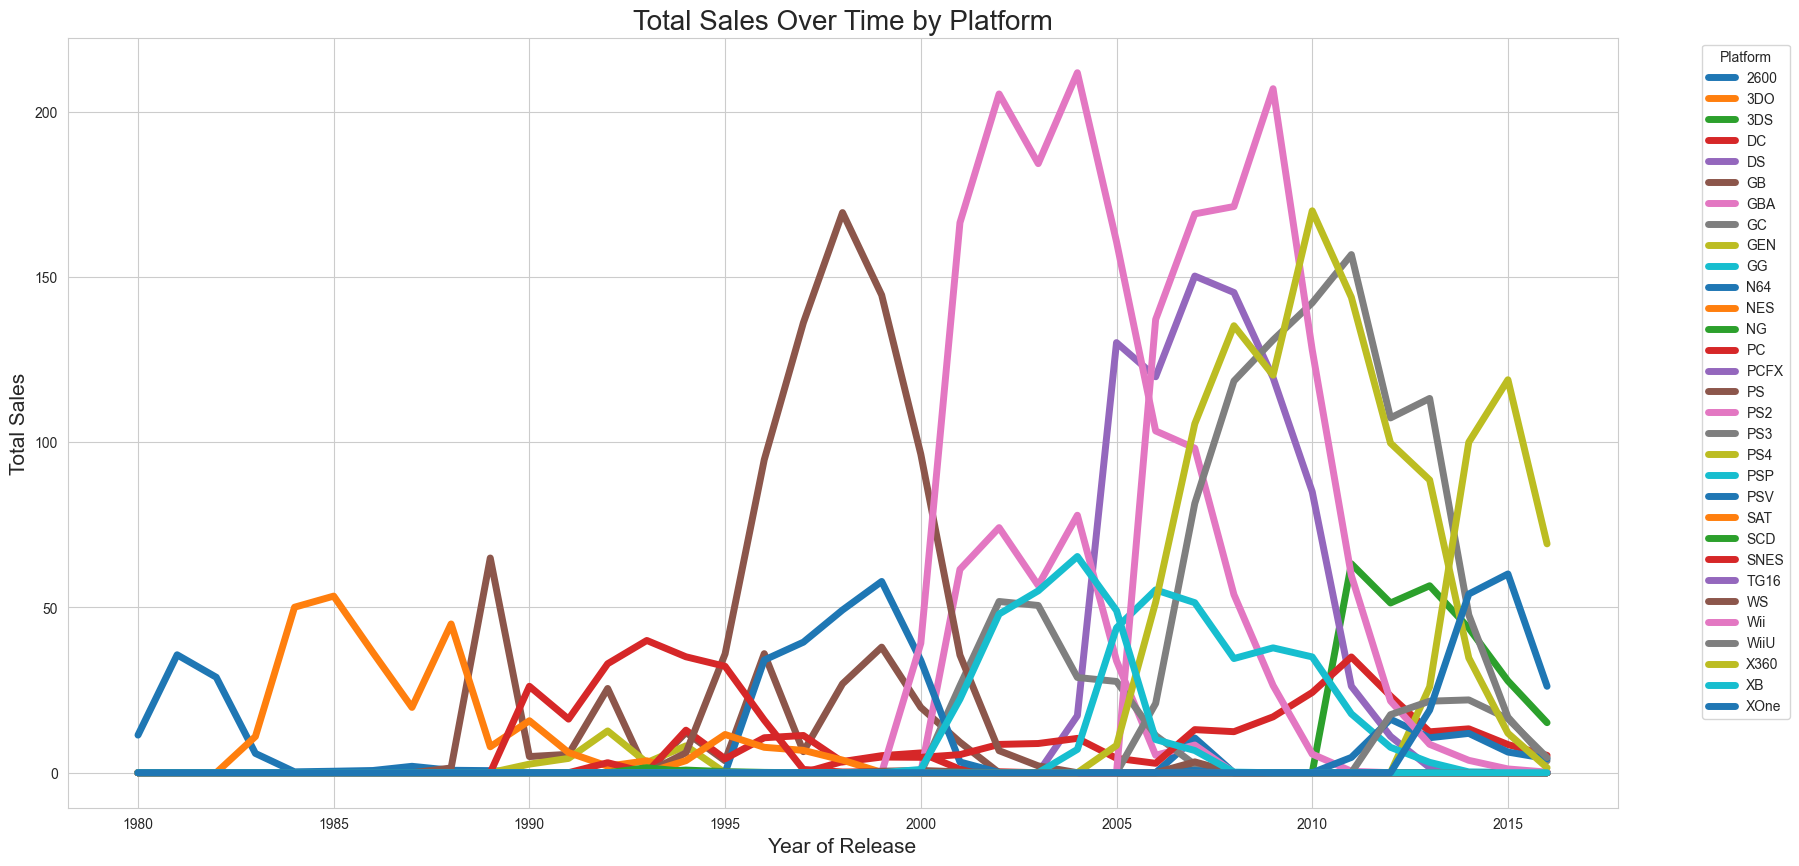

In [176]:
# Group by year of release and platform to get total sales for each platform over time; fill nans with 0
sales_over_time = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
sales_over_time = sales_over_time.fillna(0)

# Plot total sales over time by platform
sales_over_time.plot(kind='line', 
                     figsize=(20, 10),
                     linewidth= 5,  
                     grid=True)

# Add labels and title
plt.xlabel('Year of Release', 
           fontsize=15)
plt.ylabel('Total Sales', 
           fontsize=15)
plt.title('Total Sales Over Time by Platform', 
          fontsize=20)
plt.legend(title='Platform', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.show()

In [177]:
sales_by_platform = df.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack()

In [178]:
sales_by_platform_sorted = sales_by_platform.sum().sort_values(ascending=False)
sales_by_platform_sorted 

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64

Text(0, 0.5, 'Total Sales')

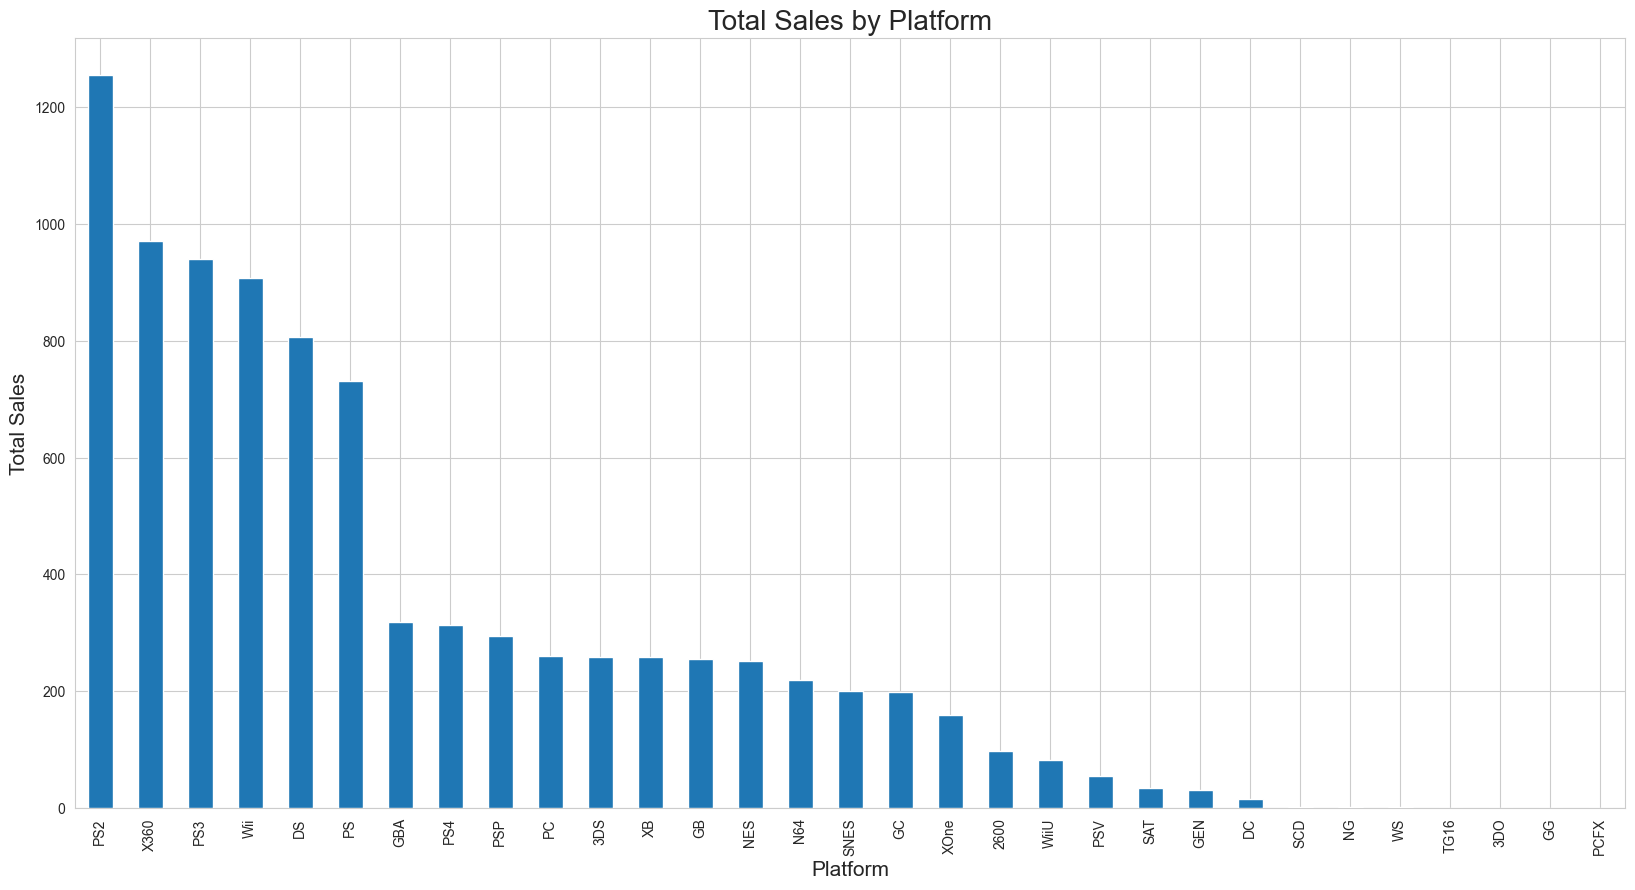

In [179]:
# Plotting the sales by platform
sales_by_platform_sorted.plot(kind= 'bar', 
                              figsize= (20, 10), 
                              grid= True, 
                              zorder= 3) 

plt.title('Total Sales by Platform', 
          fontsize= 20) 
plt.xlabel('Platform', 
           fontsize= 15) 
plt.ylabel('Total Sales', 
           fontsize= 15)

So from this information we'll take the five platforms that had the highest total sales, those being the PS2, XB360, PS3, Wii, and DS, and compare them.

In [180]:
# Groupby platform and sum the total sales for each platform
total_sales_by_plaform = df.groupby("platform")["total_sales"].sum()
sorted_total_sales_by_platform = total_sales_by_plaform.sort_values(ascending= False)

In [181]:
# Sort the total sales by platform and get the top 5
top_five_platforms = sorted_total_sales_by_platform.head(5)
top_five_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

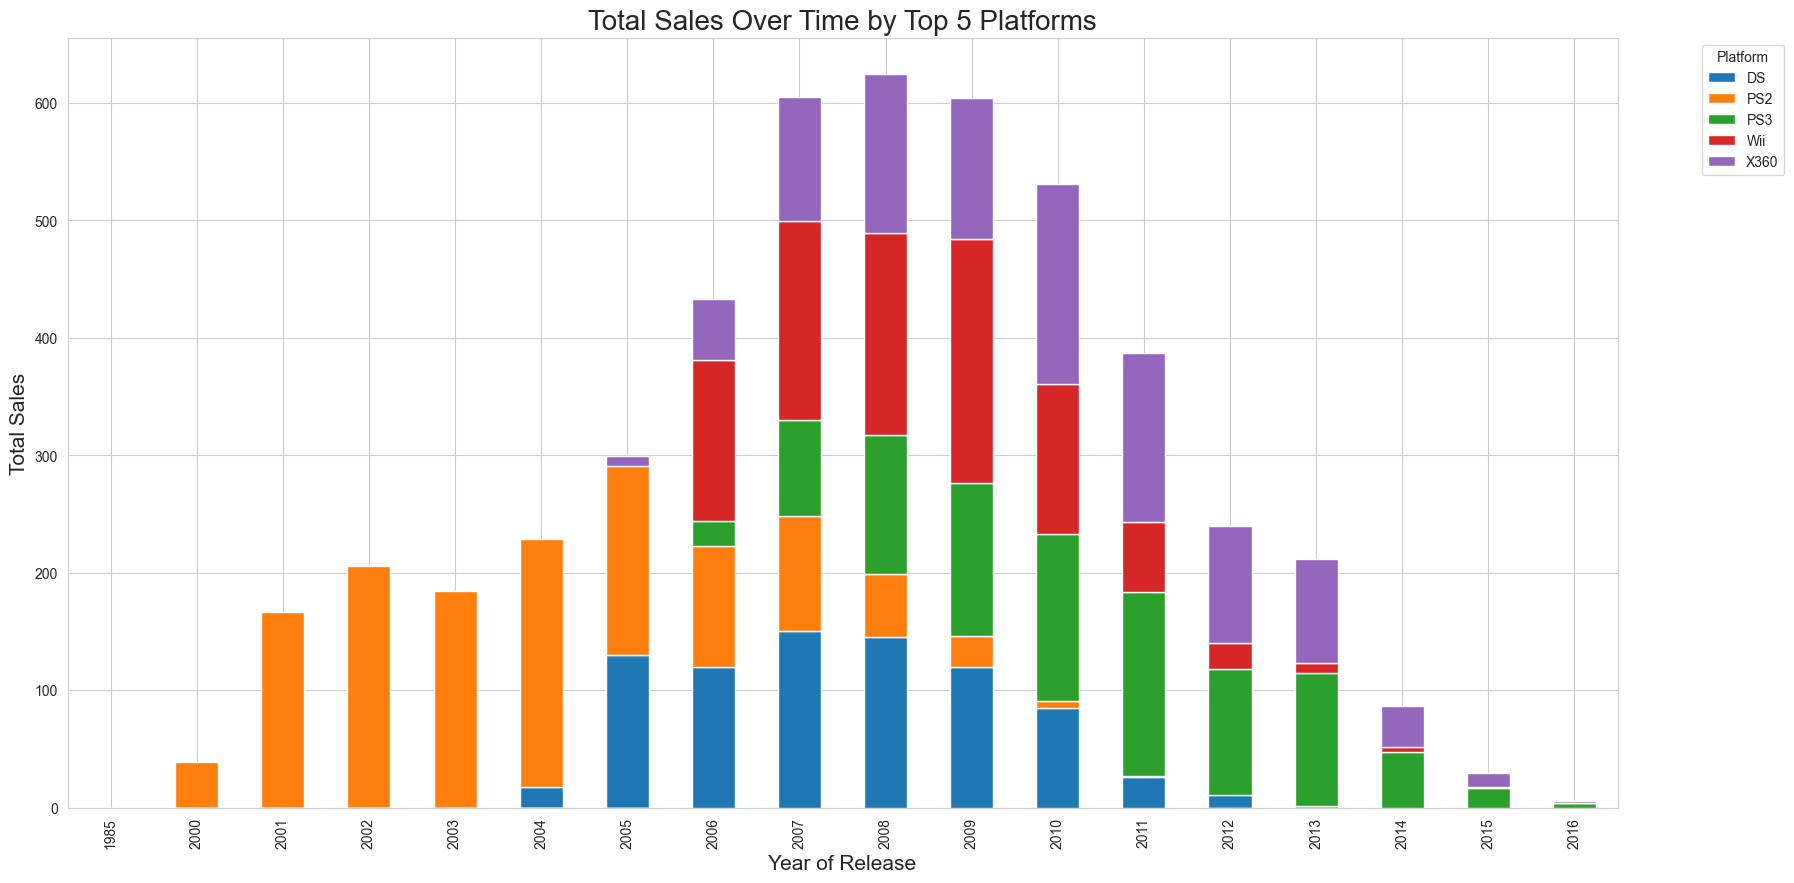

In [182]:
df_top_five_platforms = df[df["platform"].isin(top_five_platforms.index)]

sales_over_time_top_five = df_top_five_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sales_over_time_top_five.plot(kind='bar', 
                              stacked=True, 
                              figsize=(20, 10), 
                              grid=True, 
                              zorder= 3
                              )

plt.xlabel('Year of Release', 
           fontsize=15)
plt.ylabel('Total Sales', 
           fontsize=15)
plt.title('Total Sales Over Time by Top 5 Platforms', 
          fontsize=20)
plt.legend(title='Platform', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.show()

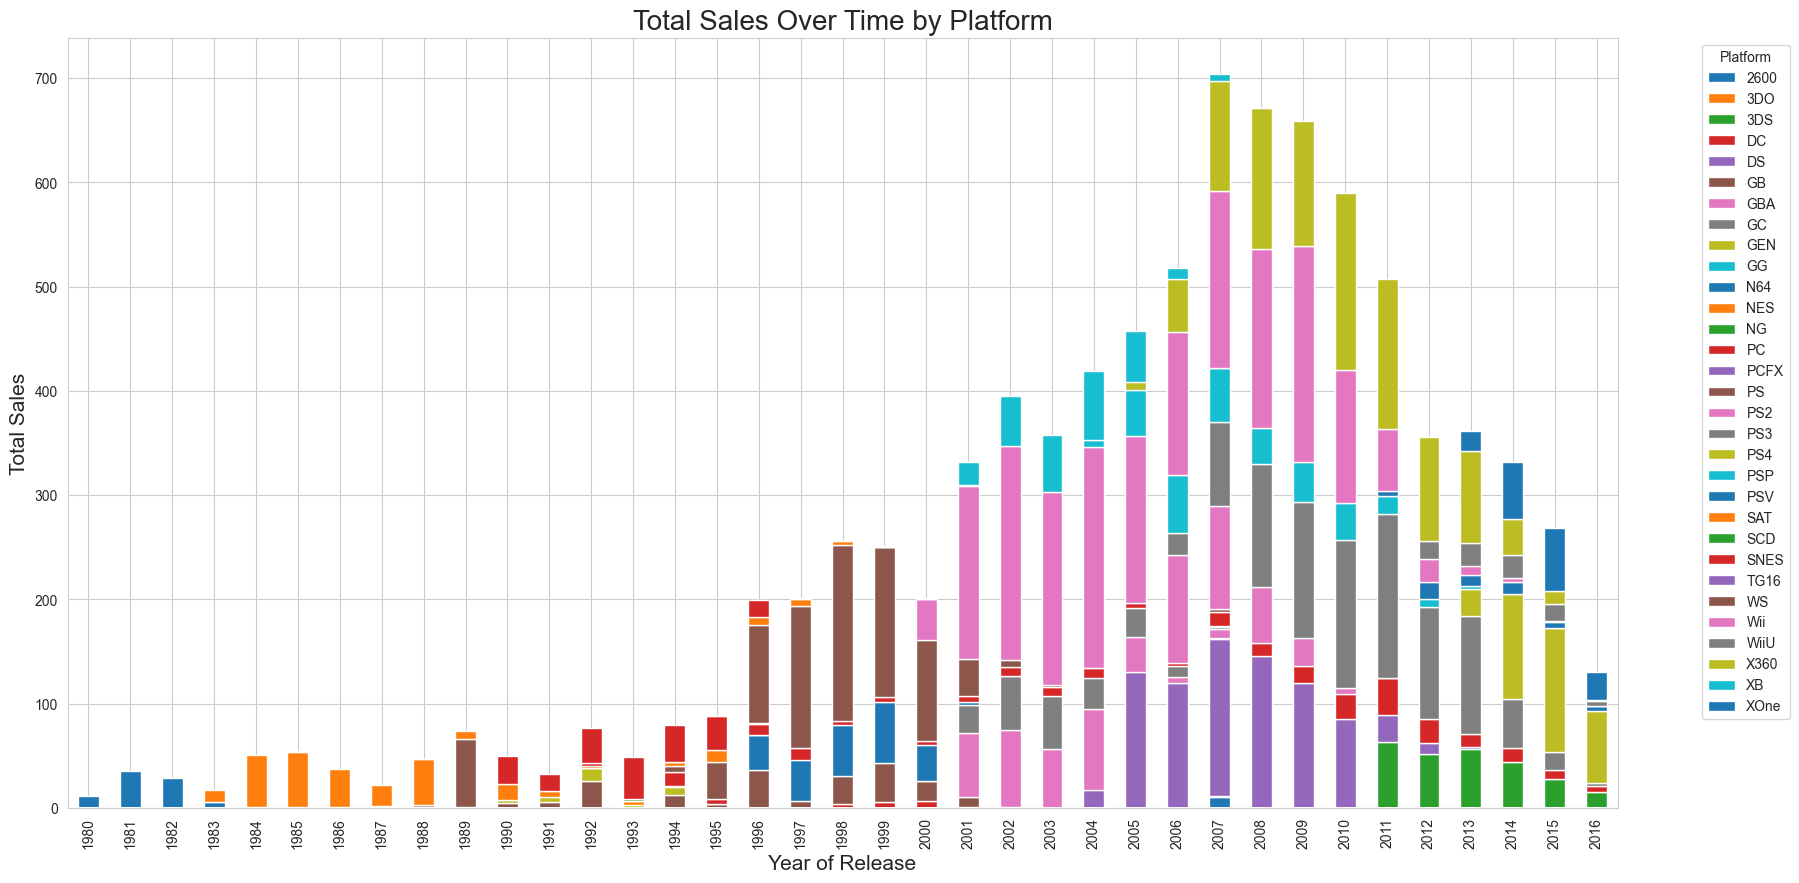

In [183]:
sales_over_time.plot(kind='bar', 
                     stacked=True, 
                     figsize=(20, 10), 
                     grid=True, 
                     zorder=3)

plt.xlabel('Year of Release', 
           fontsize=15)
plt.ylabel('Total Sales', 
           fontsize=15)
plt.title('Total Sales Over Time by Platform', 
          fontsize=20)
plt.legend(title='Platform', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.show()


Looking at this, I'd like to create a visual diplaying the timeline of game releases by platform; by doing that, we can see the market life of platforms.

   platform   min   max
0      2600  1980  2007
11      NES  1983  1994
13       PC  1985  2016
4        DS  1985  2013
5        GB  1988  2007
8       GEN  1990  1994
23     SNES  1990  1999
9        GG  1992  1992
22      SCD  1993  1994
12       NG  1993  1996
1       3DO  1994  1995
15       PS  1994  2007
21      SAT  1994  1999
24     TG16  1995  1995
10      N64  1996  2007
14     PCFX  1996  1996
3        DC  1998  2008
25       WS  1999  2001
6       GBA  2000  2007
29       XB  2000  2008
16      PS2  2000  2011
7        GC  2001  2007
19      PSP  2004  2015
28     X360  2005  2016
17      PS3  2006  2016
26      Wii  2006  2016
2       3DS  2007  2016
20      PSV  2007  2016
27     WiiU  2012  2016
18      PS4  2013  2016
30     XOne  2013  2016


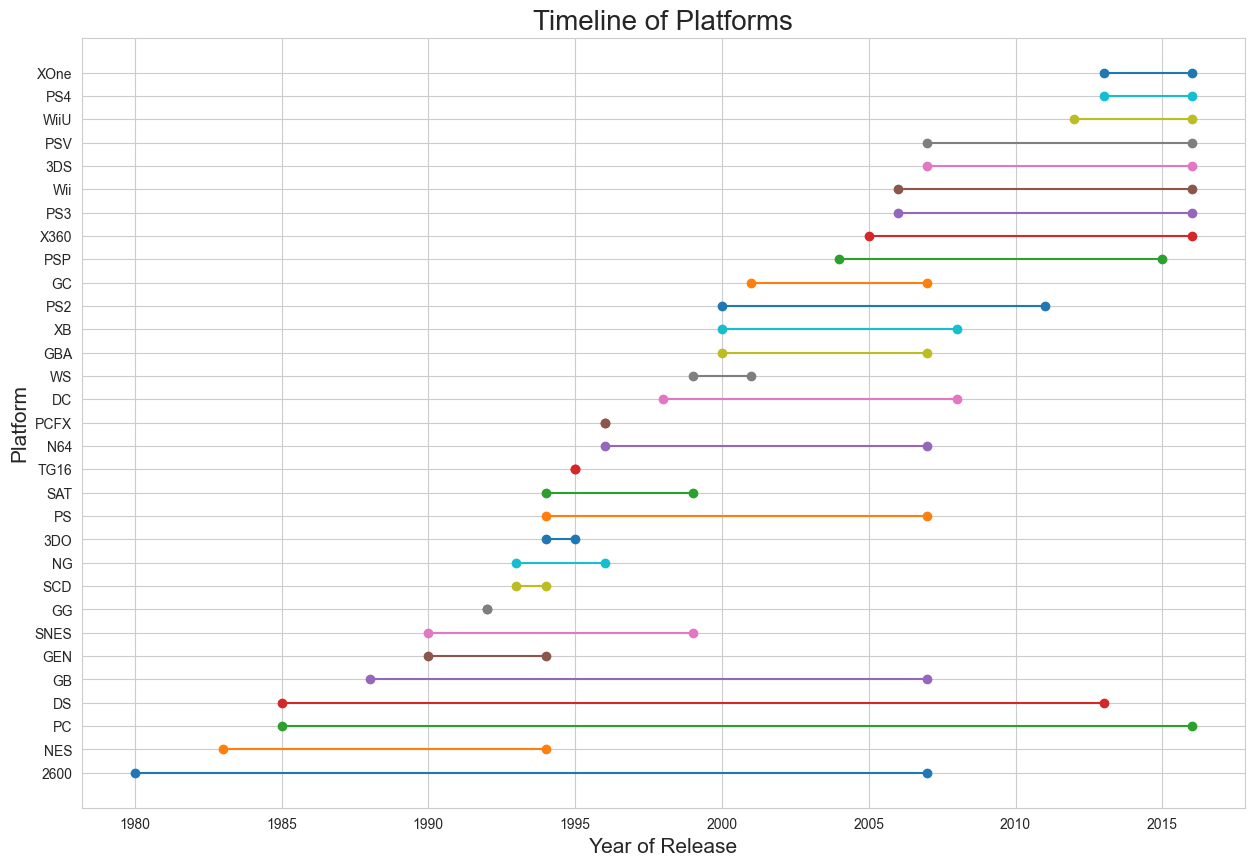

In [184]:
# Group by platform and get the min and max year of release for each platform
platform_timeline = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# Sort the platform timeline by the year of earliest release
platform_timeline = platform_timeline.sort_values(by='min')

# Display the platform timeline
print(platform_timeline)

# Plot the timeline
plt.figure(figsize=(15, 10))
for index, row in platform_timeline.iterrows():
        plt.plot([row['min'], 
                  row['max']], 
                  [row['platform'], 
                   row['platform']], 
                   marker='o')

plt.xlabel('Year of Release', 
           fontsize=15)
plt.ylabel('Platform', 
           fontsize=15)
plt.title('Timeline of Platforms', 
          fontsize=20)
plt.grid(True)
plt.show()

# The DS released in 2004, so why is the earliest release date 1985?

---

### 3.3 Determining Data to Work With
From the graphs in the previous section, we can see that 75% of game releases between 1980 and 2016 occurred during or after 2003. Not only that, remember that our top 5 platforms occur in this time period. We want more recent data though, so let's begin at an arbitrary point, 2012, which is the year the eighth platform generation began.

In [185]:
df_recent = df[(df['year_of_release'] >= 2012)]
df_recent = df_recent.reset_index(drop = True)

In [186]:
df_recent

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97,8.2,M
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97,8.1,M
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,66,7.6,M
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,66,7.6,T
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83,5.3,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,66,7.6,E
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,66,7.6,E
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,66,7.6,T
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,66,7.6,E


---

### 3.4 Platform Sales
Here we'll be looking at the platforms leading in sales, those growing or shrinking, and selecting platforms that could potentially be profitable.

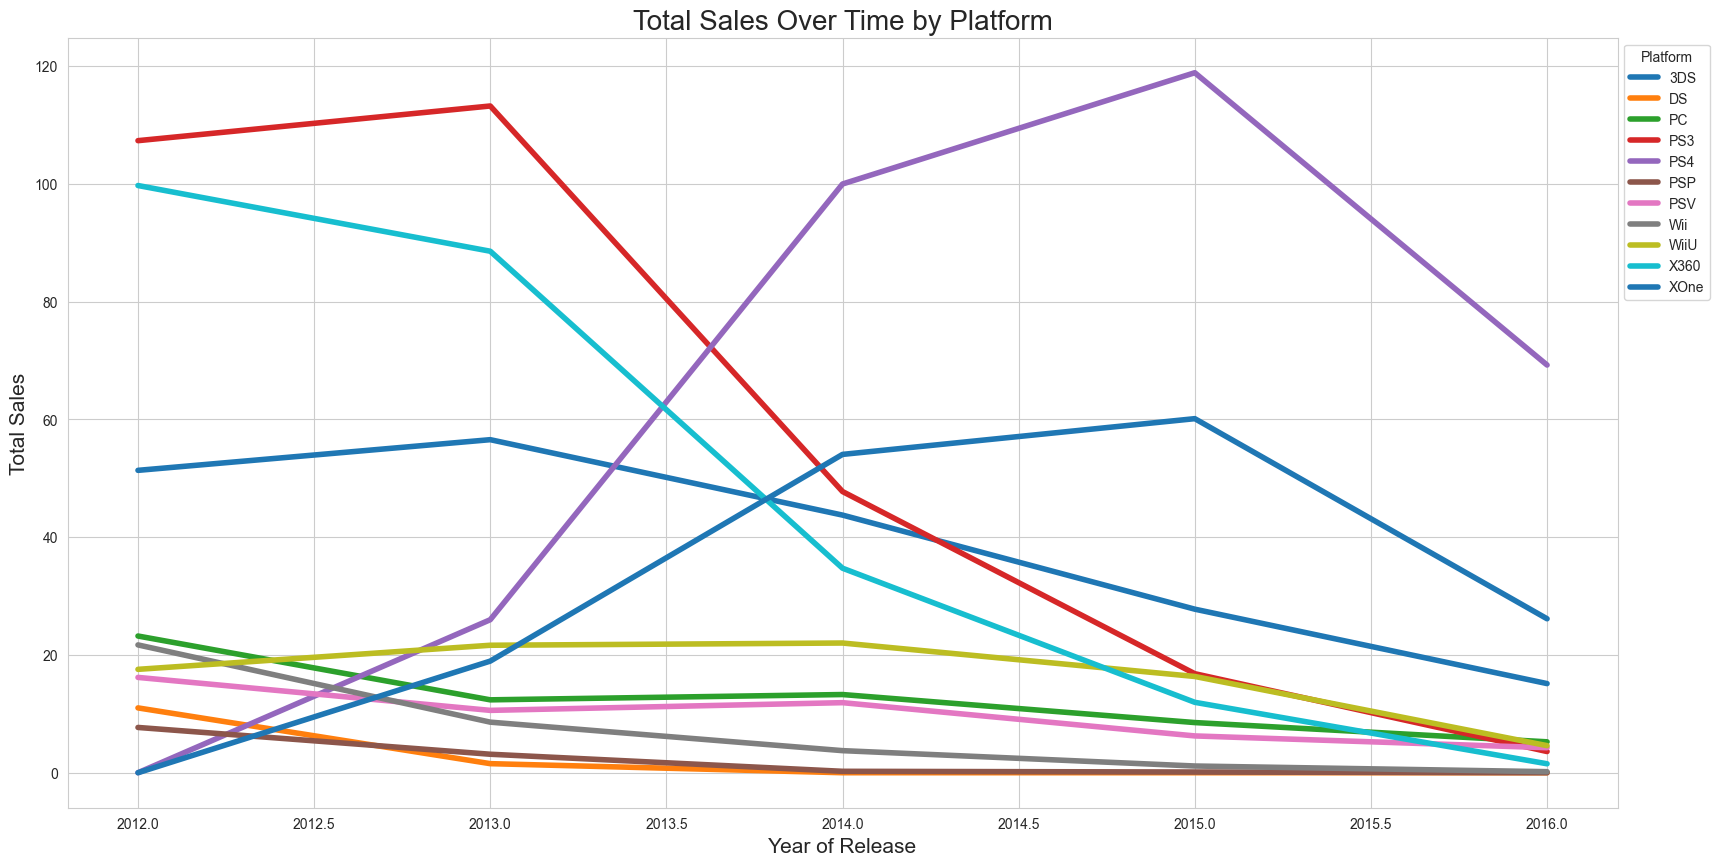

In [ ]:
recent_platform_sales.plot(kind='line', 
                          stacked=False, 
                          figsize=(20, 10), 
                          grid=True, 
                          zorder=3, 
                          linewidth=4)

plt.xlabel('Year of Release', 
           fontsize=15)
plt.ylabel('Total Sales', 
           fontsize=15)
plt.title('Total Sales Over Time by Platform', 
          fontsize=20)
plt.legend(title='Platform', 
           bbox_to_anchor=(1, 1), 
           loc='upper left')
plt.show()


Alright, so from this we see that currently the PS4 is winning in terms of sales by a noticeable margin, and the XOne in second place. No other platforms seem to be thriving. The Wii U seems to be an unsuccessful platform. The 3DS appears to be performing okay compared to all other platforms, but would it be worth campaigning for? Despite succeeding the DS, it doesn't have the same reputation as its predecessor. 

We can see that in the past the PS3 and XB360 were both successful platforms that strongly competed against one another; however, once their successors released, their sales fell and they were replaced by their successors. One thing to note though is that the XOne is lagging behind in sales compared to the PS4. From this though, it seems that the diversity of brands has narrowed to just three: Microsoft (XBox), Nintendo, and Sony (Playstation). Aside from those, we also have PC.

Nintendo is performing poorly at the moment, so it would not be a good approach to campaign with them. The PS4 is performing the best of all and seems to be holding that spot, so I would say that we'll be going the route of pivoting towards the PS4 for this project. The XOne, though not performing as well, is a platform that shouldn't be excluded. Console exclusivity limits the size of potential players. 

---

### 3.5 Global Sales
Let's break down global sales by platform using a boxplot and seeing how sales compare.

In [188]:
# Ensure the total_sales column is numeric
df_recent['total_sales'] = pd.to_numeric(df_recent['total_sales'], errors='coerce')

# Create the box plot
total_sales_platform_boxplot = px.box(df_recent, 
                                      x='platform', 
                                      y='total_sales', 
                                      title='Total Sales by Platform', 
                                      labels={'platform': 'Platform', 
                                              'total_sales': 'Total Sales'}, 
                                      color_discrete_sequence=px.colors.qualitative.Set1)

total_sales_platform_boxplot.update_layout(title_x = 0.5, 
                                           width = 1000, 
                                           height = 600, 
                                           yaxis_type = 'log', 
                                           font = dict(size = 14), 
                                           boxmode = 'group')
total_sales_platform_boxplot.show()

The median of the PS4 and PS3 are identical; the XOne in nearly identical to both. The 360, despite being in decline, has the highest median sales. Something worth noting as well is that the median for the Wii and Wii U is close to that of the four previously mentioned platforms. That's interesting considering our data shows the former to have exhausted its market life and the latter to be a commercial flop. 

---

### 3.6 Reviews & Sales
Here we are going to see if there is a correlation between 'user_score', 'critic score', and 'total sales'. To do this, we'll first build a scatter plot to get a visual of our information, then we'll look at the descriptive stats. Finally, we'll use .corr() to see if there is any correlation between the three. For this section, we'll specifically be looking at the PS3.

In [189]:
# Filter the dataframe to only include the PS3
ps3 = df[df['platform'] == 'PS3']

# Creating a scatter plot of user score v critic score with total sales as the size of the points
ps3_critic_score_sales = px.scatter(ps3, 
                                    x = 'user_score', 
                                    y = 'critic_score', 
                                    size = 'total_sales',
                                    hover_name = 'name', 
                                    size_max = 60)

# Add labels and title
ps3_critic_score_sales.update_layout(title = {'text': 'PS3 Total Sales by Score and Sales', 'x': 0.5}, 
                                     xaxis_title = 'User Score', 
                                     yaxis_title = 'Critic Score', 
                                     font = dict(size = 14))

ps3_critic_score_sales.show()


In [190]:
# Looking at descriptive stats for user and critic scores
print(f'User Score: {ps3.user_score.describe()} \n\n Critic Score: {ps3.critic_score.describe()}')

User Score: count    1331.000000
mean        7.024493
std         1.256149
min         0.200000
25%         6.700000
50%         7.600000
75%         7.600000
max         9.100000
Name: user_score, dtype: float64 

 Critic Score: count    1331.000000
mean       68.700225
std        11.224349
min        13.000000
25%        66.000000
50%        66.000000
75%        76.000000
max        98.000000
Name: critic_score, dtype: float64


In [191]:
# Calculating correlation
corr_ps3 = ps3[['user_score', 'critic_score', 'total_sales']].corr()

print(corr_ps3)

              user_score  critic_score  total_sales
user_score      1.000000      0.460535     0.031161
critic_score    0.460535      1.000000     0.442969
total_sales     0.031161      0.442969     1.000000


There doesn't seem to be a correlation between user/critic score and total sales. 

---

### 3.7 Same Game, Different Platform
Now we're going to compare the sales of multi-platform games. To begin, we'll perform a data imputation on the ps4, xone, and 3ds to see which games are multiplatform.

In [192]:
names_ps4 = df_recent[df_recent['platform'] == 'PS4']
names_xone = df_recent[df_recent['platform'] == 'XOne']
names_3ds = df_recent[df_recent['platform'] == '3DS']

common_names_ps4_xbox = np.intersect1d(names_ps4['name'], 
                                       names_xone['name'])
common_names_all = np.intersect1d(common_names_ps4_xbox, 
                                  names_3ds['name'])

print(f'Multiplatform Games:\n {common_names_all}')

Multiplatform Games:
 ['Adventure Time: Finn & Jake Investigations' 'Angry Birds Star Wars'
 'FIFA 14' 'FIFA 15' 'LEGO Jurassic World' 'LEGO Marvel Super Heroes'
 "LEGO Marvel's Avengers" 'LEGO The Hobbit' 'Lego Batman 3: Beyond Gotham'
 'Lego Star Wars: The Force Awakens' 'Skylanders SWAP Force'
 'Skylanders: SuperChargers' 'Skylanders: Trap Team' 'Terraria'
 'The Amazing Spider-Man 2 (2014)' 'The LEGO Movie Videogame']


In [193]:
df_recent[df_recent['name'].isin(common_names_all)].groupby(['name', 'platform'])['total_sales'].sum().sort_values(ascending= False)

name                                        platform
FIFA 14                                     PS3         6.46
FIFA 15                                     PS4         6.08
                                            PS3         4.28
FIFA 14                                     X360        4.22
                                            PS4         3.01
                                                        ... 
Adventure Time: Finn & Jake Investigations  WiiU        0.05
LEGO Jurassic World                         PC          0.04
Terraria                                    XOne        0.04
                                            WiiU        0.03
The Amazing Spider-Man 2 (2014)             PC          0.01
Name: total_sales, Length: 121, dtype: float64

---

### 3.8 Sales & Distribution of Games by Genre
Let's dive into what the most profitable genres are and see if we can make any generalizations about genres at either end of the sales spectrum.

To begin, we'll group by 'genre' and then count total sales per genre and sort it in descending order. Then we'll create a bar graph and a bit of detail to it.

In [194]:
genre_recent = df_recent.groupby('genre')['total_sales'].size().sort_values(ascending = False)
sales_by_genre = px.bar(genre_recent, 
                        title = 'Total Sales by Genre', 
                        labels = {'index': 'Genre', 
                                  'value': 'Total Sales'}, 
                        color_discrete_sequence= px.colors.qualitative.Set1)

sales_by_genre.update_layout(title_x = 0.5, 
                             showlegend = False, 
                             font = dict(size = 14, 
                                         color = 'black'), 
                                         xaxis_title = 'Genre')

In [195]:
# Is there a correlation between amount of games in a genre and sales?
genre_percentage = df_recent.groupby('genre').size()/df_recent.shape[0] * 100
genre_percentage.sort_values(ascending= False)

genre
Action          35.724186
Role-Playing    12.820513
Adventure       10.464310
Sports           9.286209
Shooter          8.142758
Misc             6.652807
Racing           3.984754
Fighting         3.776854
Platform         2.945253
Simulation       2.772003
Strategy         2.460152
Puzzle           0.970201
dtype: float64

In [196]:
# Create a box plot for total sales by genre
total_sales_by_genre = px.box(df_recent, 
                              x='genre', 
                              y='total_sales', 
                              title='Total Sales by Genre', 
                              labels={'genre': 'Genre', 
                                      'total_sales': 'Total Sales'}, 
                              color_discrete_sequence=px.colors.qualitative.Set1)

total_sales_by_genre.update_layout(title_x=0.5, 
                                   showlegend=False, 
                                   font=dict(size=14, 
                                             color='black'),
                                   xaxis=dict(tickangle=-45),
                                   width=1200,  # Increase the width of the figure
                                   height=600)  # Adjust the height if needed

total_sales_by_genre.show()

Our bar graph indicates that the 'Action' genre has the highest sales by a far margin, exceeding that of the 'Sports' genre by nearly 300%; HOWEVER, our box plot shows that average sales are higher in the 'Shooter' genre. Conversely, games in the 'Puzzle' genre seem to not generate many sales (total and average). Generalization: Genres with low sales aren't necessarily bad, they just cater to a smaller or more niche audience; the reverse holds true.

---
---

# 4.0 Regional Profiles
In this section, we'll be comparing North America, Europe, and Japan to examine for market variations across regions. Afterwards, we'll look at the top five platforms for each region, top five genres, and determine whether rating affects sales in that region. We're going to split df_recent into three dataframes - one each for North America, Europe, and Japan.

In [197]:
df_na = df_recent[df_recent['na_sales'] > 0]
df_eu = df_recent[df_recent['eu_sales'] > 0]
df_jp = df_recent[df_recent['jp_sales'] > 0]

---

### 4.1 Top 5 Platforms by Region
We'll first group by platform and add up all of the values in na_sales, eu_sales, and jp_sales, then merge the three together. By doing this, we receive a dataframe that has 'platform' as it's index, and the sum of sales for that platform in na, eu, and jp. Let's then take the resulting dataframe and plot it as a stacked bar chart.


In [198]:
# Grouping by platform and respective sales for that region
df_na_sales = df_na.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
df_eu_sales = df_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
df_jp_sales = df_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)

In [199]:
# Merging the three dataframes back into one, 
# where the index is the platform and the remainding three columns are sales
df_combined = pd.merge(df_na_sales, 
                       df_eu_sales, 
                       on = 'platform')
df_combined = pd.merge(df_combined, 
                       df_jp_sales, 
                       on = 'platform')

df_combined

,na_sales,eu_sales,jp_sales
platform,,,
X360,140.05,74.52,1.57
PS4,108.74,141.09,15.96
PS3,103.38,106.86,35.29
XOne,93.12,51.59,0.34
3DS,55.31,42.64,87.79
WiiU,38.10,25.13,13.01
Wii,17.45,11.92,3.39
PSV,10.98,11.36,21.04
DS,4.59,3.53,3.72


In [200]:
top_five_platforms_na = df_na.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()
print(f'Top five platforms in NA: \n{top_five_platforms_na}')

# Top 5 platforms in NA as a percentage
top_five_platforms_na / top_five_platforms_na.sum() * 100

Top five platforms in NA: 
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64


platform
X360    27.976428
PS4     21.721934
PS3     20.651219
XOne    18.601678
3DS     11.048742
Name: na_sales, dtype: float64

In [201]:
top_five_platforms_eu = df_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()
print(f'Top five platforms in EU: \n{top_five_platforms_eu}')

# Top 5 platforms in EU as a percentage
top_five_platforms_eu / top_five_platforms_eu.sum() * 100

Top five platforms in EU: 
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64


platform
PS4     33.858891
PS3     25.644348
X360    17.883369
XOne    12.380610
3DS     10.232781
Name: eu_sales, dtype: float64

In [202]:
top_five_platforms_jp = df_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()
print(f'Top five platforms in JP: \n{top_five_platforms_jp}')

# Top 5 platforms in JP as a percentage
top_five_platforms_jp / top_five_platforms_jp.sum() * 100

Top five platforms in JP: 
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


platform
3DS     50.719279
PS3     20.388237
PSV     12.155526
PS4      9.220637
WiiU     7.516321
Name: jp_sales, dtype: float64

In [203]:
# Creating bar plot
df_combined_fig = px.bar(df_combined, 
                          title = 'Total Sales by Region and Platform (2013 - 2016)', 
                          color_discrete_sequence = px.colors.qualitative.Set1)

# Add labels and titles
df_combined_fig.update_layout(title_x = 0.5, 
                              xaxis_title = 'Platform', 
                              yaxis_title = 'Totale Sales', 
                              font = dict(size = 14, 
                                          color = 'black'), 
                                          showlegend = True, 
                                          legend_title = 'Region'
                                          )

The PS3 and XBox 360 are still popular in both NA and Europe; however it seems that people in NA tend toward the 360 than the PS3, and the reverse holds true, albeit not as strongly. Despite this, remember that they are last generation consoles and their sales are currently falling due to the presence of their successors, so we should ignore the 360 and PS3. 

The PS4 is performing the best overall, though seeing more sales in Europe. The Xbox One however isn't doig so well overall, but it's NA sales are roughly the same as the PS4's. One major aspect to note is that the XB360 and XBOne have virtually zero presence in Japan. Because of that, an XOne release may not be the best due to the low popularity in Europe compared to its competetor, and because it has essentially no presence in one of our target markets. The 3DS however is the most popular in Japan, where it holds the most sales compared to other modern platforms. What that means is that if we want to market to Japan, then we may want to consider the 3DS. 

---

### 4.2 Top 5 Genres by Region

In [204]:
top_five_genres_na = df_na.groupby('genre')['na_sales'].sum().sort_values(ascending= False).head()
top_five_genres_eu = df_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending= False).head()
top_five_genres_jp = df_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending= False).head()

print(f'Top five genres in NA:\n {top_five_genres_na}, \n')
print(f'Top five genres in EU:\n {top_five_genres_eu}, \n')
print(f'Top five genres in JP:\n {top_five_genres_jp}, \n')

Top five genres in NA:
 genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64, 

Top five genres in EU:
 genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64, 

Top five genres in JP:
 genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64, 



In both NA and Europe, the first four most popular genres are the samen those being 'Action', 'Shooter', 'Sports', and 'Role-playing'. The fifth most popular in NA are games that fall into the miscellaneous category, whereas for Europe, racing games serves as the fifth. Japan is quite different than the other two. Unlike NA and Europe where 'Action' is the most popular, 'Role-playing' is the most popular genre in Japan, followed by 'Action', 'Misc', 'Simulation', and 'Fighting'. To summarize, what we can see from this is that buying trends by genre are similar between NA and Europe, but different in Japan. 

---

### 4.3 Do Ratings Affect Sales?
To determine whether maturity ratings affect sales, we'll first group by rating and then sales of a respective region, then get a quick overview. After, we'll merge the three on the 'ratings' column so that we can compare the three in one df.

In [205]:
ratings_na = df_na.groupby('rating')['na_sales'].sum().sort_values(ascending= False)
ratings_eu = df_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending= False)
ratings_jp = df_jp.groupby('rating')['jp_sales'].sum().sort_values(ascending= False)


print(f'NA Ratings:\n {ratings_na} \n')
print(f'EU Ratings:\n {ratings_eu} \n')
print(f'JP Ratings:\n {ratings_jp} \n')

NA Ratings:
 rating
M       251.43
E       141.52
T       122.32
E10+     75.70
Name: na_sales, dtype: float64 

EU Ratings:
 rating
M       211.19
E       144.98
T        95.28
E10+     55.37
Name: eu_sales, dtype: float64 

JP Ratings:
 rating
T       108.70
E        53.40
M        22.29
E10+      8.19
Name: jp_sales, dtype: float64 



In [206]:
ratings_combined = pd.merge(ratings_na, ratings_eu, on = 'rating')
ratings_combined = pd.merge(ratings_combined, ratings_jp, on = 'rating')

ratings_combined = ratings_combined.rename(columns = {'na_sales_x': 'na_sales', 
                                                      'na_sales_y': 'eu_sales', 
                                                      'ja_sales': 'jp_sales'
                                                      }
                                                      )

ratings_combined

,na_sales,eu_sales,jp_sales
rating,,,
M,251.43,211.19,22.29
E,141.52,144.98,53.40
T,122.32,95.28,108.70
E10+,75.70,55.37,8.19


Now let's create a bar graph to analyze.

In [207]:
# Creating bar chart
region_ratings = px.bar(ratings_combined, 
                        title = 'Ratings v Sales by Region')

# Add labels and titles
region_ratings.update_layout(
    title = {'text': 'Ratings v Sales by Region', 'x': 0.5},
    xaxis_title = 'Rating', 
    yaxis_title = 'Sales',
    legend_title = 'Region'
)

# Update the legend names
region_ratings.for_each_trace(lambda t: t.update(name = {'na_sales': 'North America', 
                                                         'eu_sales': 'Europe', 
                                                         'jp_sales': 'Japan'}[t.name]))

region_ratings.show()

Both 'E' and 'M' rated games perform well and have practically the same amout of sales in both NA and EU, but in Japan, there is a sharp contrast where 'E' rated games generate more sales than 'M' rated games. 'T' rated games are less popular in NA and EU, but the most popular rating in JP. Finally, we have E10+ games with the least amount of sales across all regions.

Something I've noticed is that games deemed appropriate for anyone at least the ages of 10 - 16 don't perform as well. Why is there that dip?

---
---

# 5.0 Testing Hypotheses 
In this chapter, we'll formulate and test several hypotheses related to video game sales data. The goal is to use statistical methods to determine whether observed differences between groups — such as platforms, genres, or regions  —are statistically significant or could have occurred by chance.

We'll begin by clearly stating each hypothesis, specifying the null and alternative hypotheses. Next, we'll select appropriate statistical tests based on the data type and distribution. We'll then prepare the data, check assumptions, and perform the tests. For each hypothesis, we'll calculate p-values and compare them to a chosen significance level to decide whether to reject the null hypothesis.

Throughout this process, we'll document each step, including data selection, test choice, and interpretation framework, but we'll refrain from drawing any conclusions until all analyses are complete. 

---

### 5.1 Average User Ratings of the Xbox One and PC
Are the average user ratings of the Xbox One and PC platforms the same?

H₀ = The average user ratings of the Xbox One and PC platforms are the same. 

H₁ = The average user ratings of the Xbox One and PC platforms are different.

In [208]:
avg_user_rating_xone = df_recent[df_recent['platform'] == 'XOne']['user_score'].mean() 
avg_user_rating_pc = df_recent[df_recent['platform'] == 'PC']['user_score'].mean()

alpha = 0.01 
pc_xone_results = st.ttest_ind(
    df_recent[df_recent['platform'] == 'XOne']['user_score'], 
    df_recent[df_recent['platform'] == 'PC']['user_score'], 
    equal_var = True
)

print('pvalue:', pc_xone_results.pvalue)

if pc_xone_results.pvalue < alpha: 
    print('We reject the null hypothesis')
else: 
    print("We can't reject the null hypothesis")

pvalue: 0.1859219986664502
We can't reject the null hypothesis


Here's how I formulated the null and alternative hypothesis: Recall that the null hypothesis, H₀, represents a statement of no effect or no difference, and it's what we seek to test against. Here we wish to determine whether or not the average user ratings for the XBox One and PC are the same, and to assume no difference would be the null hypothesis. For this question, we can't reject the null hypothesis because the p-value is greater than our significance level (0.01). The reason I chose this as our significance level is because we are testing a specific hypothesis. 

---

### 5.2 Average User Ratings for the Action and Sports Genres
Are the average user ratings for the Action and Sports genres different?

H₀ = The average user ratings for the Action and Sports genres are not different.

H₁ = The average user ratings for the Action and Sports genres are not the same.

In [209]:
avg_user_rating_action = df_recent[df_recent['genre'] == 'Action']['user_score'].mean()
avg_user_rating_sports = df_recent[df_recent['genre'] == 'Sports']['user_score'].mean()

alpha = 0.01

avg_user_action_sports = st.ttest_ind(
    df_recent[df_recent['genre'] == 'Action']['user_score'], 
    df_recent[df_recent['genre'] == 'Sports']['user_score'], 
    equal_var = True
    )


print('p-value:', avg_user_action_sports.pvalue)

if avg_user_action_sports.pvalue < alpha: 
    print('We reject the null hypothesis')
else: 
    print("We can't reject the null hypothesis")

p-value: 1.5143199279065504e-40
We reject the null hypothesis


Now how did I formulate the null and alternative hypothesis here? Recall that the alternative hypothesis, H₁, represents a statement of effect or difference, and it's what we seek to test for. Here we wish to determine if their is a difference in average user ratings between the 'Action' and 'Sports genres, and to assume a difference would be the alternative hypothesis. For this question, we reject the null hypothesis because the p-value is SIGNIFICANTLY LOWER than our significance level (0.01). The reason I chose this as our significance level is because we are testing a specific hypothesis. 

---
---

# 6.0 Conclusion

Given everything we've learned, my conclusion is that for a campaign, the PS4 would be a great platform for all regions. It boasts well in sales and popularity in all regions, and is only nearing the middle of its market cycle. While the XBox One has some ground and we could potentially do a campaign for it, it wouldn't be as worthwhile - especially for Japan where it has virtually no presence. If we wanted to do a Japanese campaign, then the 3DS would be a good option because it's the most popular platform there currently. Also, Games rated E10+ and T don't perform as well as games rated E and M, so we should focus on those. As for genres, Action is by far the most popular in North America and Europe, but in Japan it's roleplaying.

That all being said, my recommendations are as follows:
- If marketing to North America or Europe, action games that are rated E or M and on the PS4 and possibly XBox One are the best to advertise.
-If marketing to Japan, role-playing games that are rated E or M and on the PS4 or possibly the 3DS are the best to advertise.